In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
traindf = pd.read_csv('/content/train.csv')

In [3]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [5]:
req_tr = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [6]:
selected_tr = traindf[req_tr]

In [9]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,3.5,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,2.5,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,3.5,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2.0,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,3.5,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,2.5,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3.0,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2.0,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2.0,3234


## **Keeping only the necessary columns**

In [10]:
train_df = selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [12]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,3.5,548,4276,7,208500
1,6,2.5,460,3786,6,181500
2,6,3.5,608,4492,7,223500
3,7,2.0,642,4190,7,140000
4,9,3.5,836,5541,8,250000
...,...,...,...,...,...,...
1455,7,2.5,460,4247,6,175000
1456,7,3.0,500,5688,6,210000
1457,9,2.0,252,5832,7,266500
1458,5,2.0,240,3234,5,142125


## Splitting the dataset and Creating Pipeline

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(train_df,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 1168
Rows in test set:292



In [14]:
housing = train_set.drop("SalePrice",axis=1)
housing_labels = train_set["SalePrice"].copy()

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


In [17]:
X_train = my_pipeline.fit_transform(housing)

In [18]:
X_train

array([[-0.96456591, -0.28514353, -0.86383727, -0.13352109, -0.82044456],
       [ 0.27075534,  0.35656677, -0.45626397, -0.13428593, -0.08893368],
       [-1.58222654, -1.56856412, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.96456591, -0.28514353,  0.45366713, -1.16605156, -0.82044456],
       [ 0.27075534, -0.92685383, -1.23349678, -0.26966215,  0.64257719],
       [ 0.27075534, -0.28514353,  0.87071888,  0.28025593,  0.64257719]])

In [19]:
Y_train = housing_labels

In [20]:
Y_train.shape

(1168,)

## **Correlations**

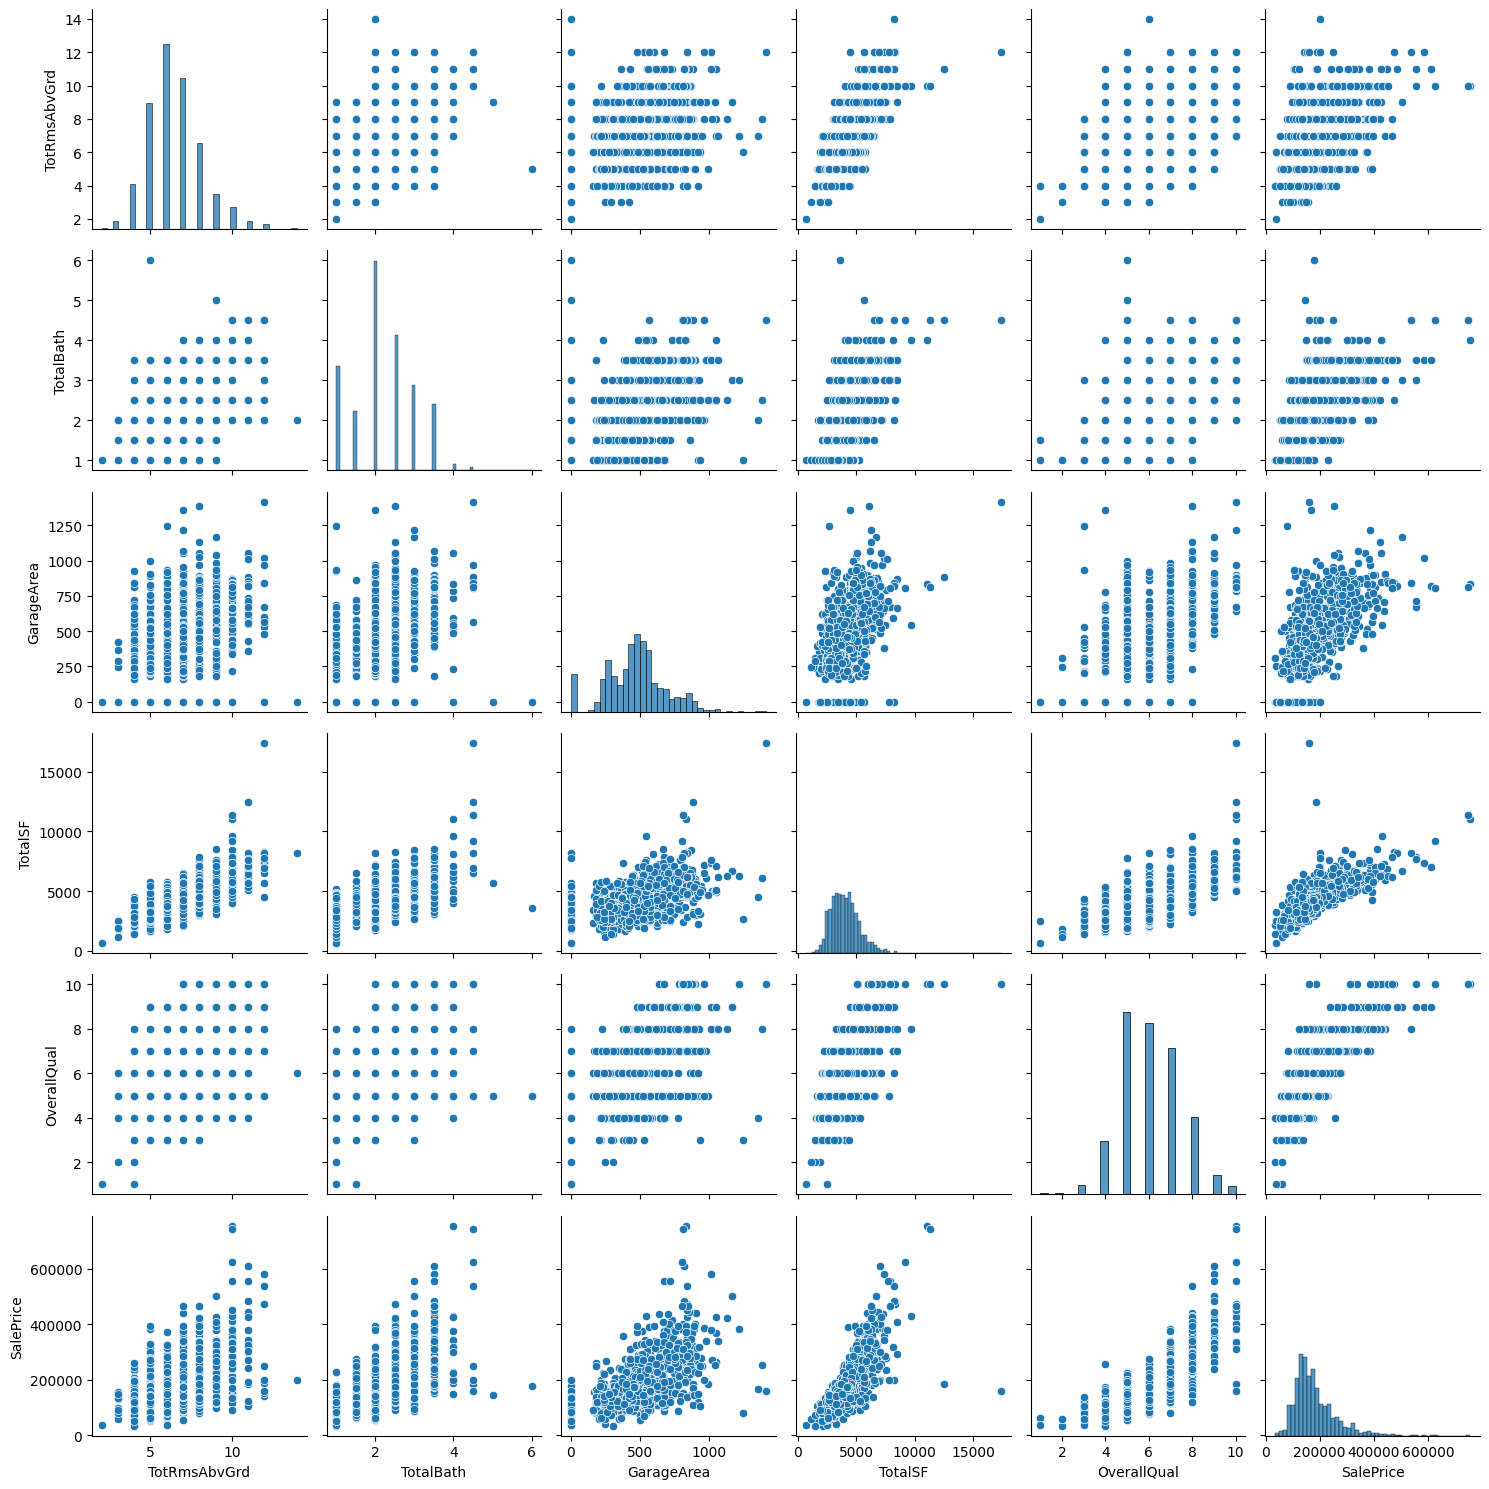

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [22]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
TotalSF,0.773909
TotalBath,0.631731
GarageArea,0.623431
TotRmsAbvGrd,0.533723


<Axes: >

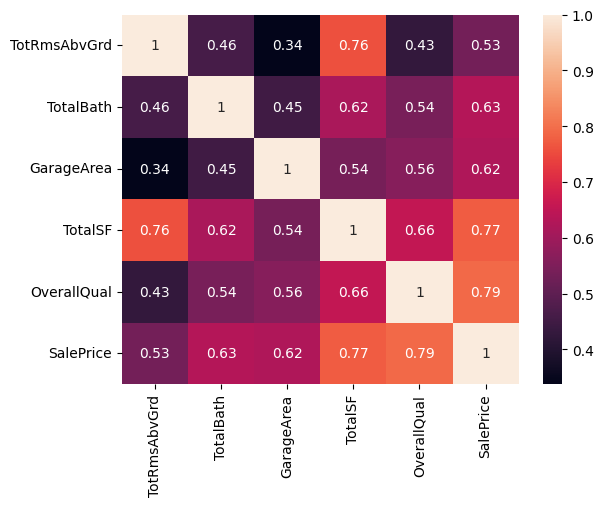

In [23]:
sns.heatmap(train_df.corr(),annot = True)

## **Working with Test Dataframe**

In [24]:
testdf = pd.read_csv("/content/test (1).csv")

In [25]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [27]:
selected_tst = testdf[req_tst]

In [28]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6


In [30]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                    selected_tst['BsmtHalfBath'].fillna(0) +
                                    selected_tst['FullBath'].fillna(0) +
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +
                                  selected_tst['1stFlrSF'].fillna(0) +
                                  selected_tst['2ndFlrSF'].fillna(0) +
                                  selected_tst['LowQualFinSF'].fillna(0) +
                                  selected_tst['GrLivArea'].fillna(0))

<ipython-input-30-88b69dcf1189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
<ipython-input-30-88b69dcf1189>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [31]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [32]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [33]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [34]:
x_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [35]:
x_test

array([[-0.96456591, -1.56856412,  1.2024646 , -1.10333489, -0.82044456],
       [-0.34690528, -0.28514353, -0.77853123, -0.09910341, -0.08893368],
       [-0.34690528,  0.99827706,  0.02713693,  0.05309923, -0.82044456],
       ...,
       [ 0.27075534, -0.28514353,  0.47262403, -0.34002719, -0.82044456],
       [-0.34690528, -0.28514353, -2.25716927, -0.96719384, -0.82044456],
       [ 1.50607659,  0.99827706,  0.82332664,  0.67261751,  0.64257719]])

## **Model Selection**

In [36]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)


RandomForestRegressor()

In [37]:
y_train_pred = model.predict(X_train)

In [38]:
y_train_pred[:5]

array([148637., 170632.,  92969., 162091., 144506.])

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [40]:
proc_data = my_pipeline.transform(some_data)

In [41]:
model.predict(proc_data)

array([148637., 170632.,  92969., 162091., 144506.])

In [42]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [43]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [44]:
train_rmse = np.sqrt(train_mse)

In [45]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 155200579.69, Training RMSE: 12457.95


## **Cross - Validation**

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([ 24312.14916833,  12825.45318264,  25741.45206685,  13386.63342115,
        46656.48717154,  12002.53485114,  20732.55282139,  12649.88411685,
         9185.66520358,  58051.91296033,  30944.43939308,  28874.76963353,
        15780.51652501,  10062.02501013,  17785.80240442,  18544.2995974 ,
        19252.01753584,  33425.94981738,  35696.22724367,  24596.14128761,
        26136.26420753,  22006.09124061,  20165.13848818,  28823.13336163,
        20096.47740867,  17428.30502892,  44278.49988941,  41855.43692551,
       171809.40832148,  42416.78173683,  20897.17978607,  33098.76083637,
        22254.89650798,  31022.72737538,  50591.97285343,  11761.95817605,
        21720.90101994,  24008.8384417 ,  20576.89474922,  33773.26088301,
        16654.78228916,  33062.93236351,  25999.37019497,  31839.63088653,
        31714.15141686,  28912.84771735,  28730.0519854 ,  37120.08132727,
        22651.60163288,  22951.39436358,  15651.22706358,  53743.97007064,
        32611.57857326,  

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_pred

array([131098.  , 155917.32, 155493.37, ..., 137393.  , 113188.  ,
       230784.63])

In [57]:
import pandas as pd

pred = pd.DataFrame(y_pred, columns=['SalePrice'])

try:
    sub_df = pd.read_csv('/content/Needed_data.xlsx.csv')
except FileNotFoundError:

    sub_df = pd.DataFrame({'Id': range(1, len(y_pred) + 1)})

datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']

datasets.to_csv('/content/Needed_data.csv', index=False)